<a href="https://colab.research.google.com/github/emrekiran07/ANN_Handwritten_Digit_Recognition/blob/master/ANN_Handwritten_Digit_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Loading the minst dataset
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [12]:
print("Train set shape: ", x_train.shape, y_train.shape)

Train set shape:  (60000, 28, 28) (60000,)


In [13]:
print("Test set shape: ",x_test.shape, y_test.shape)

Test set shape:  (10000, 28, 28) (10000,)


In [14]:
num_labels = len(np.unique(y_train))

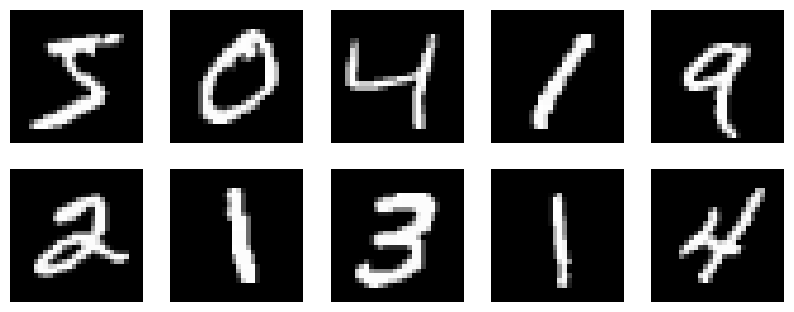

In [17]:
plt.figure(figsize =(10,10))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap='gray')
  plt.axis('off')

##Data Preperation

In [18]:
#OneHotEncoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##Reshaping

In [19]:
image_size = x_train.shape[1]

In [20]:
image_size

28

In [23]:
print(f"Size of x_train:  {x_train.shape}")
print(f"Size of x_test:  {x_test.shape}")

Size of x_train:  (60000, 28, 28)
Size of x_test:  (10000, 28, 28)


In [24]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [25]:
print(f"Size of x_train:  {x_train.shape}")
print(f"Size of x_test:  {x_test.shape}")

Size of x_train:  (60000, 28, 28, 1)
Size of x_test:  (10000, 28, 28, 1)


##Standardization

In [26]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

##Modelling

In [28]:
from keras.api._v2.keras import activations
model = tf.keras.Sequential([
    Flatten(input_shape = (28,28,1)),
    Dense(units = 128,activation='relu',name='layer1'),
    Dense(units = num_labels, activation = 'softmax', name='output_layer')
])

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train, y_train,   epochs=10, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0628 - precision: 0.9853 - recall_2: 0.9787 - accuracy: 0.9819 - val_loss: 0.0792 - val_precision: 0.9791 - val_recall_2: 0.9730 - val_accuracy: 0.9760
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0530 - precision: 0.9868 - recall_2: 0.9819 - accuracy: 0.9844 - val_loss: 0.0765 - val_precision: 0.9808 - val_recall_2: 0.9753 - val_accuracy: 0.9784
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0441 - precision: 0.9893 - recall_2: 0.9853 - accuracy: 0.9872 - val_loss: 0.0758 - val_precision: 0.9804 - val_recall_2: 0.9756 - val_accuracy: 0.9775
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0384 - precision: 0.9906 - recall_2: 0.9874 - accuracy: 0.9888 - val_loss: 0.0760 - val_precision: 0.9802 - val_recall_2: 0.9758 - val_accuracy: 0.9776
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0318 - preci

##Evaulation

In [35]:
history = model.fit(x_train, y_train,   epochs=10, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0122 - precision: 0.9979 - recall_2: 0.9972 - accuracy: 0.9976 - val_loss: 0.0761 - val_precision: 0.9811 - val_recall_2: 0.9788 - val_accuracy: 0.9794
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0105 - precision: 0.9983 - recall_2: 0.9977 - accuracy: 0.9980 - val_loss: 0.0750 - val_precision: 0.9805 - val_recall_2: 0.9783 - val_accuracy: 0.9792
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0086 - precision: 0.9988 - recall_2: 0.9984 - accuracy: 0.9985 - val_loss: 0.0777 - val_precision: 0.9813 - val_recall_2: 0.9795 - val_accuracy: 0.9800
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0078 - precision: 0.9989 - recall_2: 0.9986 - accuracy: 0.9988 - val_loss: 0.0841 - val_precision: 0.9792 - val_recall_2: 0.9773 - val_accuracy: 0.9778
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0070 - preci

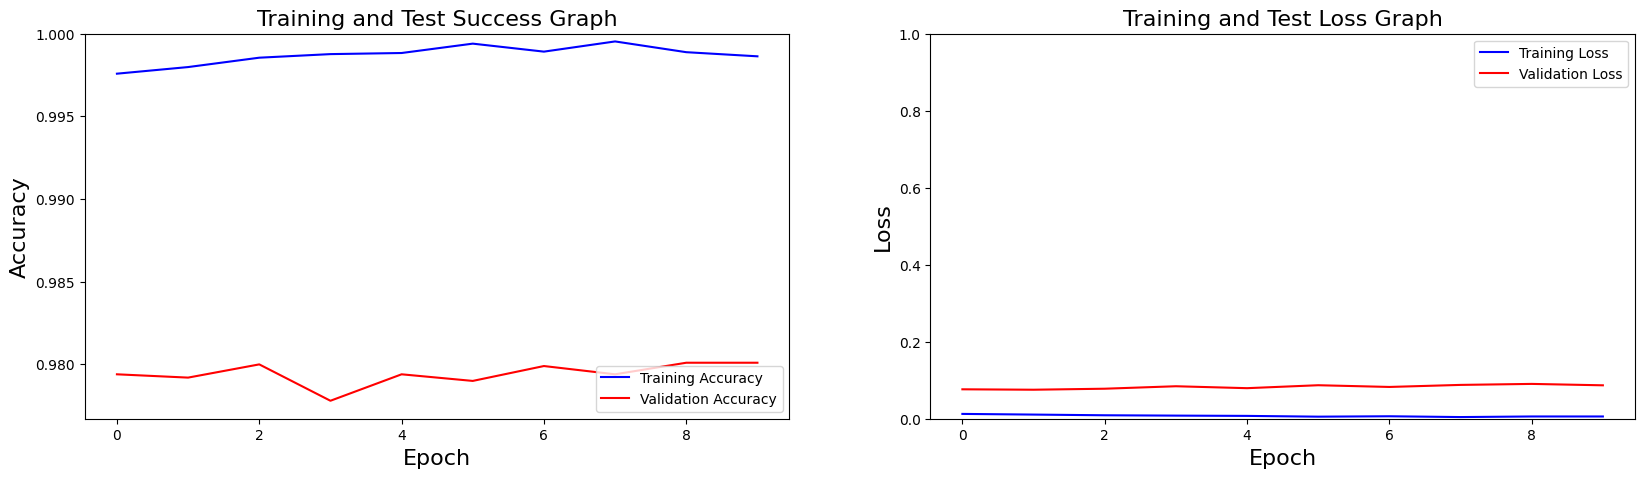

In [36]:
###########################
# Accuracy and Loss Graphs
###########################

#------ Graph 1 Accuracy -------

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color='b', label='Training Accuracy')
plt.plot(history.history["val_accuracy"], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Test Success Graph', fontsize=16)

#------ Graph 2 Loss -------
plt.subplot(1,2,2)
plt.plot(history.history["loss"], color='b', label='Training Loss')
plt.plot(history.history["val_loss"], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Test Loss Graph', fontsize=16)
plt.show()

In [38]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose = False)
print("\nTest Accuracy: %.1f%%" % (100.0*acc))
print("\nTest Loss: %.1f%%" % (100.0*loss))
print("\nTest Precision: %.1f%%" % (100.0*precision))
print("\nTest Recall: %.1f%%" % (100.0*recall))


Test Accuracy: 98.0%

Test Loss: 8.7%

Test Precision: 98.1%

Test Recall: 97.9%


## Saving the model

In [39]:
model.save('mnist_model.h5')

In [40]:
import random

In [41]:
random = random.randint(0, x_test.shape[0])

In [42]:
random

6898

In [43]:
test_img = x_test[random]

In [44]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

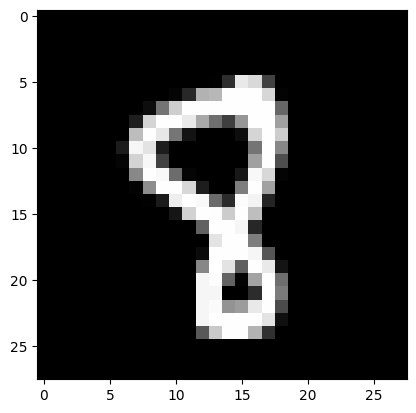

In [46]:
plt.imshow(test_img.reshape(28,28), cmap='gray');

In [47]:
test_data = x_test[random].reshape(1,28,28,1)

In [48]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 117ms/step


In [49]:
probability

array([[1.1318911e-08, 2.7380757e-08, 3.7577291e-05, 6.5214099e-06,
        4.8722125e-14, 6.3699163e-06, 1.6847574e-08, 2.4429248e-06,
        9.9993527e-01, 1.1829317e-05]], dtype=float32)

In [50]:
predicted_class = np.argmax(probability)

In [51]:
predicted_class

8